<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/TENSORFLOW/blob/main/climate_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Image classification
* understanding how to build image recognition and object detection models with deep neural
* networks and convolutional neural networks using TensorFlow 2.x. You need to know how to:

> ❏ Define Convolutional neural networks with Conv2D and pooling layers.

> ❏ Build and train models to process real-world image datasets.

> ❏ Understand how to use convolutions to improve your neural network.

> ❏ Use real-world images in different shapes and sizes.

> ❏ Use image augmentation to prevent overfitting.

> ❏ Use ImageDataGenerator.

> ❏ Understand how ImageDataGenerator labels images based on the directory structure.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_dir="/content/drive/MyDrive/climate/train/"
valid_dir ="/content/drive/MyDrive/climate/valid/"
test_dir="/content/drive/MyDrive/climate/test/"

import os
import random
import pathlib
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as imimg
import tensorflow as tf


data_dir= pathlib.Path(train_dir)
class_label=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_label

print(f"tensorflow_version:{tf.__version__}")

tensorflow_version:2.8.0


In [3]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-e8184f75-3a2b-c6d9-3c04-3c95ddcddd68)


### Checking the image:

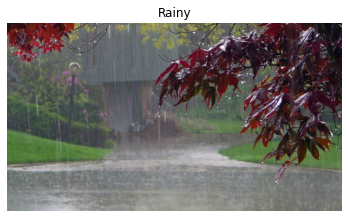

In [4]:
##checking the image
class_name=random.choice(class_label)
target_folder=train_dir+class_name
target_folder
# randomly select dir:
random_image=random.sample(os.listdir(target_folder),1)
# converting list to string -------using .join to random_images we can avoid[TypeError: can only concatenate str (not "list") to str]
image="".join(random_image)

#randomly selecting the image from target folder:
show_image=target_folder+"/"+image

##generating image:
img = mpimg.imread(show_image)
plt.imshow(img)
plt.title(class_name)
plt.axis("off");

In [5]:
## how the image look like
print(f"image:{img}/n shape:{img.shape}")

image:[[[ 35  16  20]
  [ 32  13  19]
  [ 34  15  21]
  ...
  [ 12   7  14]
  [ 14   9  16]
  [ 12   7  14]]

 [[ 33  12  17]
  [ 32  11  18]
  [ 34  15  21]
  ...
  [  9   6  13]
  [ 14  11  18]
  [ 13  10  17]]

 [[ 33  12  17]
  [ 34  13  20]
  [ 36  15  22]
  ...
  [ 12   9  16]
  [ 17  14  21]
  [ 17  14  21]]

 ...

 [[135 139 140]
  [136 140 141]
  [139 143 144]
  ...
  [114 115 109]
  [113 114 108]
  [113 114 108]]

 [[131 135 136]
  [131 135 136]
  [132 136 137]
  ...
  [117 118 112]
  [114 115 109]
  [110 111 105]]

 [[132 136 137]
  [133 137 138]
  [134 138 139]
  ...
  [118 119 113]
  [115 116 110]
  [111 112 106]]]/n shape:(506, 900, 3)


### Scaling and batching data:

In [6]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
valid_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             shuffle=True,
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             batch_size=32)
valid_data=valid_datagen.flow_from_directory(valid_dir,
                                             shuffle=True,
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             batch_size=32,
                                             )



Found 662 images belonging to 4 classes.
Found 441 images belonging to 4 classes.


In [7]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels),images.shape,labels.shape

(32, 32, (32, 224, 224, 3), (32, 4))

### Model layering :

In [34]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
model = tf.keras.models.Sequential([
                                      
                         Conv2D(128, 6, activation='relu', input_shape=(224,224,3)),
                         Conv2D(128, 6, activation='relu'),
                         MaxPool2D(),

                         
                         Conv2D(128, 6, activation='relu'),
                         MaxPool2D(),
                         
                         
                         Conv2D(64, 6, activation='relu'),
                         MaxPool2D(),
                         Flatten(),
                         Dense(4, activation='softmax')
])
# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

### setting the callback function

In [35]:
## callback
# Create a function to implement a ModelCheckpoint callback with a specific filename 
callbacks= tf.keras.callbacks.ModelCheckpoint(filepath=("/content/drive/MyDrive/climate/callback/dataset_climate_model"), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

# Create a function to implement a Earlystop callback with loss monitor)
Early_stop=tf.keras.callbacks.EarlyStopping( monitor='val_loss',
                                             patience=10,
                                             verbose=0)

In [36]:
## getting the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 219, 219, 128)     13952     
                                                                 
 conv2d_5 (Conv2D)           (None, 214, 214, 128)     589952    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 107, 107, 128)    0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 102, 102, 128)     589952    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 51, 51, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 64)       

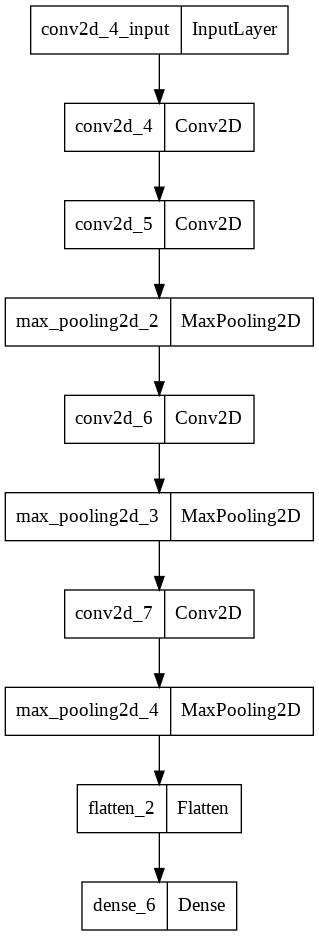

In [37]:
##layering map:
tf.keras.utils.plot_model(model)

In [ ]:
## fitting the model:
history=model.fit(train_data,
                  validation_data=valid_data,
                  validation_steps=int(len(valid_data)),
                  steps_per_epoch=int(len(train_data)),
                  batch_size=32,
                  epochs=10,
                  callbacks=[Early_stop])

In [39]:
model.evaluate(valid_data)

14/14 [==============================] - 2s 168ms/step - loss: 0.5684 - accuracy: 0.6848


[0.5683563351631165, 0.6848072409629822]

In [18]:
load_model=tf.keras.models.load_model("/content/drive/MyDrive/climate/callback/dataset_climate_model")
load_model.evaluate(valid_data)

14/14 [==============================] - 3s 162ms/step - loss: 0.2796 - accuracy: 0.7528


[0.27961641550064087, 0.7528344392776489]

In [19]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history)

###Saving the model and loading it


In [20]:
##saving the model
load_model.save("/content/drive/MyDrive/climate/callback/dataset_climate_model.h5")

In [22]:
#loading the model
load_save_model=tf.keras.models.load_model("/content/drive/MyDrive/climate/callback/dataset_climate_model.h5")

In [23]:
##evaluating the lad modled:
load_save_model.evaluate(valid_data)


14/14 [==============================] - 2s 146ms/step - loss: 0.2796 - accuracy: 0.7528


[0.27961644530296326, 0.7528344392776489]

In [24]:
##prediction on valid class data:
predictions=model.predict(valid_data)

In [25]:
# How many predictions are there?
len(predictions),predictions.shape,predictions[:5]

(441,
 (441, 4),
 array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
        [7.2907215e-01, 3.8264540e-07, 2.7092725e-01, 2.0216869e-07],
        [9.0124673e-01, 9.8672390e-02, 7.9802936e-05, 1.0814783e-06]],
       dtype=float32))

In [26]:
# Get the class predicitons of each label
pred_probability=predictions.argmax(axis=1)
pred_probability[:10]

array([3, 3, 3, 0, 0, 2, 2, 1, 3, 0])

### predection on unknown data:

In [27]:
print(class_label)

['Cloudy' 'Rainy' 'Shine' 'Sunrise']


In [28]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img


file_name:sunrise354.jpg


Shape after new dimension: (1, 224, 224, 3)


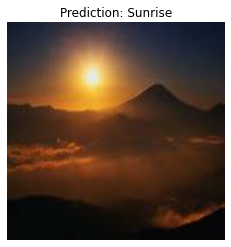

In [29]:
##initiating the directory
test_image=random.sample(os.listdir(test_dir),1)
test_image="".join(test_image)
print(f'\nfile_name:{test_image}\n')
test_folder=test_dir+test_image

#calling global variable :"load_and_prep_image"
image=load_and_prep_image(test_folder)

##expand the image dimension as the model expected shape=(None, 224, 224, 3):and we have(224, 224, 3):
image_expanded=tf.expand_dims(image,axis=0)
print(f"\nShape after new dimension: {image_expanded.shape}")

## predicting the model:
pred=load_save_model.predict(image_expanded)

# Get the predicted class
if len(pred[0]) > 1: # check for multi-class
    pred_class = class_label[pred.argmax()] # if more than one output, take the max
else:
    pred_class = class_label[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
plt.imshow(image)
plt.title(f"Prediction: {pred_class}")
plt.axis(False);

### Getting the predictions data for test whole data

In [30]:
## move in directory
test_img=os.listdir(test_dir)

## fetching the full path:
test_filenames=["/content/drive/MyDrive/climate/test/"+ pict for pict in test_img]
all_predictions=[]
y_preds=[]
for i in test_filenames:
  
  image=load_and_prep_image(i)

  ##expand the image dimension as the model expected shape=(None, 224, 224, 3):and we have(224, 224, 3):
  image_expanded=tf.expand_dims(image,axis=0)

  ## predicting the model:
  pred=load_save_model.predict(image_expanded)
  pred_probs=pred.argmax()

  y_preds.append(pred_probs)
  predicted_label=class_label[pred_probs]
  all_predictions.append(predicted_label)


In [31]:
prediction_table=pd.DataFrame({
                                  "IMAGE PATH":test_filenames,
                             "PREDICTED LABEL":all_predictions
                              })
prediction_table

,IMAGE PATH,PREDICTED LABEL
0,/content/drive/MyDrive/climate/test/cloudy300.jpg,Cloudy
1,/content/drive/MyDrive/climate/test/cloudy299.jpg,Cloudy
2,/content/drive/MyDrive/climate/test/cloudy297.jpg,Cloudy
3,/content/drive/MyDrive/climate/test/cloudy298.jpg,Cloudy
4,/content/drive/MyDrive/climate/test/rain180.jpg,Rainy
5,/content/drive/MyDrive/climate/test/rain211.jpg,Cloudy
6,/content/drive/MyDrive/climate/test/rain204.jpg,Rainy
7,/content/drive/MyDrive/climate/test/rain200.jpg,Rainy
8,/content/drive/MyDrive/climate/test/rain212.jpg,Cloudy
9,/content/drive/MyDrive/climate/test/rain202.jpg,Rainy


In [32]:
# IMG_SIZE = (224, 224)
                                                                                
# test_data = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/climate/valid/",
#                                                                 label_mode="categorical",
#                                                                 image_size=IMG_SIZE,
#                                                                 shuffle=False) # don't shuffle test data for prediction analysis

In [33]:
# # Note: This might take a minute or so due to unravelling 790 batches
# y_labels = []
# for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
#   y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
# y_labels[:10] # check what they look like (unshuffled)